# MDS - PCA

## Task Description

In this exercise, your task is to compare Multidimensional scaling (MDS) to Principal Component Analysis (PCA) for dimensionality reduction.

1. Implement the training of an algorithm and the transformation of the data into lower dimensional space.

1. Choose the dimensionality reduction method that you want to compare. Compare at least
    - PCA with 2 components
    - MDS with 2 components
    - Kernel PCA with 2 components and radial basis function kernel

1. Compare the results of the methods based on the visualizations.

In [1]:
import numpy as np
from numpy.typing import ArrayLike
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt

np.random.seed(42)

In [5]:
def plot_3d(X: ArrayLike) -> None:
    """Plot 3D data points.

    Args:
        X (ArrayLike): The data points to plot.
    """
    plt.figure().add_subplot(111, projection="3d").plot(*X.T, "o")
    plt.show()

In [8]:
def train_and_transform(X: ArrayLike, algorithm: BaseEstimator) -> ArrayLike:
    """Trains the given algorithm on the data and returns the transformed data.

    Args:
        X (ArrayLike): The input data to be transformed.
        algorithm (BaseEstimator): The algorithm to be trained and used for transformation.

    Returns:
        ArrayLike: The transformed data.
    """
    algorithm.fit(X)
    # AttributeError: 'MDS' object has no attribute 'transform'

    if hasattr(algorithm, "transform"):
        return algorithm.transform(X)
    elif hasattr(algorithm, "fit_transform"):
        return algorithm.fit_transform(X)

Dataset: spring_1


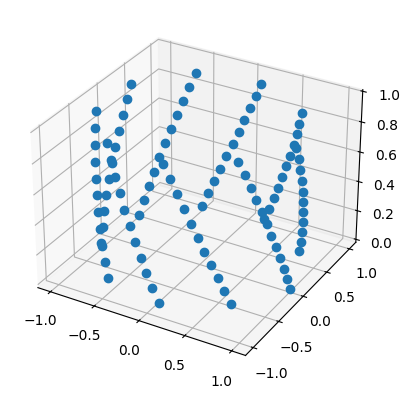

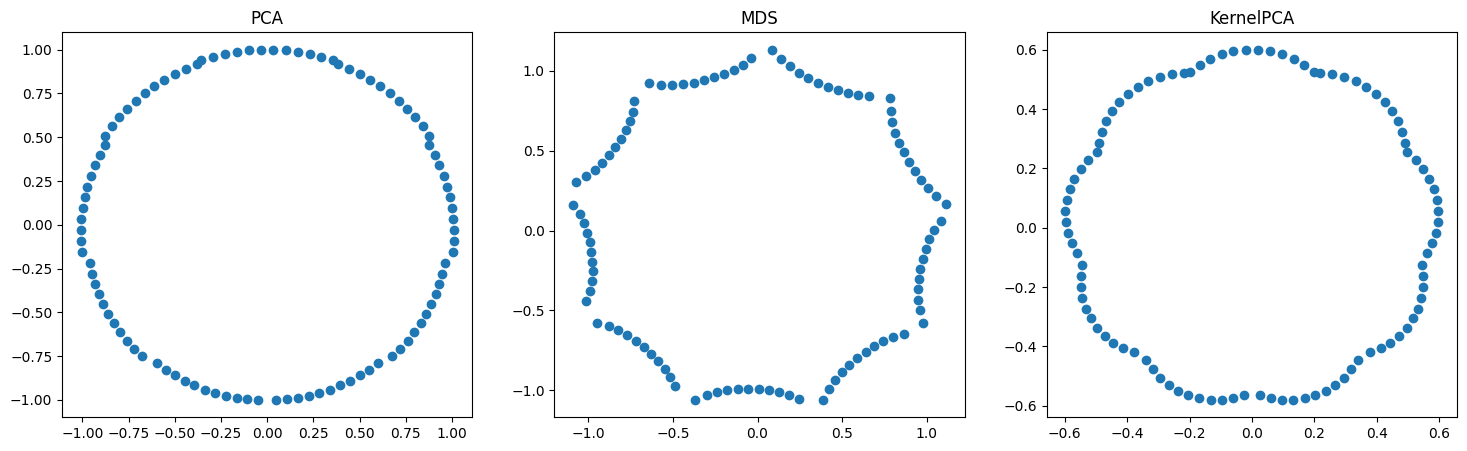

Dataset: spring_2


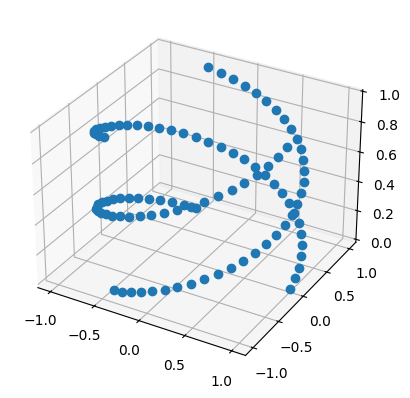

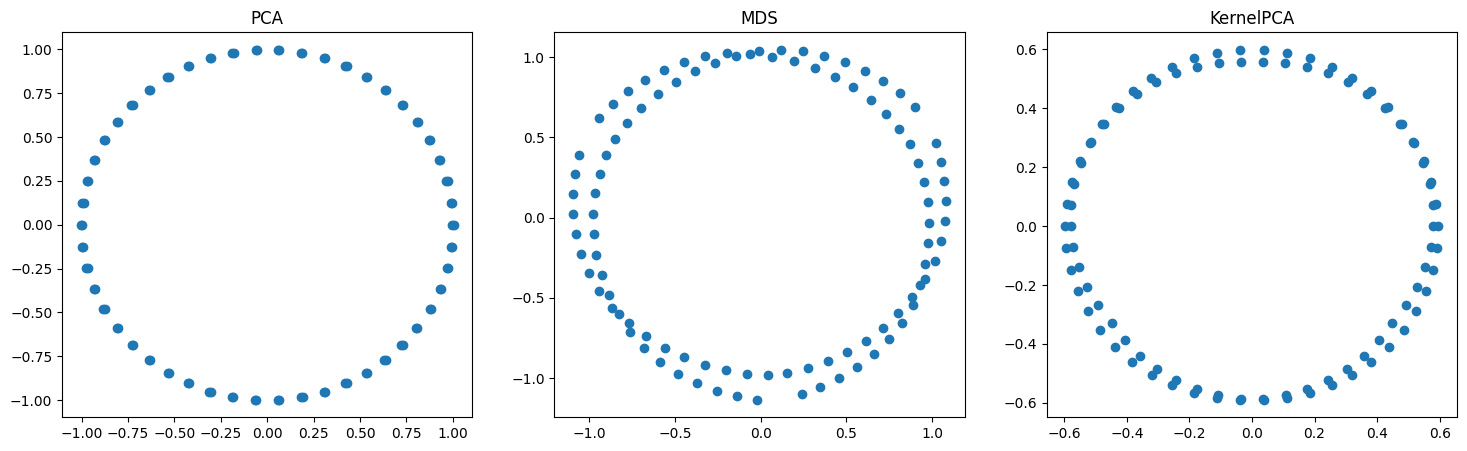

Dataset: box


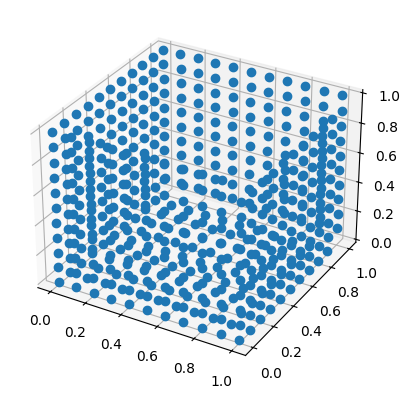

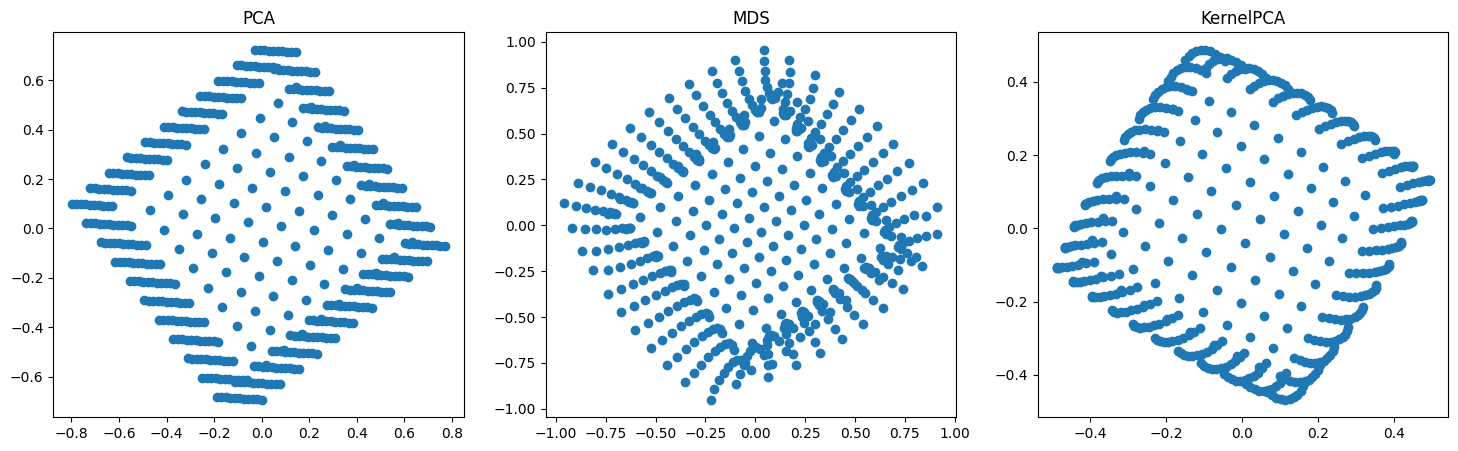

In [9]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS

datasets = ["spring_1", "spring_2", "box"]

# TODO: Construct the algorithms you want to compare
algorithms = [
# - PCA with 2 components
    PCA(n_components=2),
# - MDS with 2 components
    MDS(n_components=2),
# - Kernel PCA with 2 components and radial basis function kernel
    KernelPCA(n_components=2, kernel="rbf")
]
n_algs = len(algorithms)

for dataset in datasets:
    print("=" * 20)
    print(f"Dataset: {dataset}")
    print("=" * 20)

    X = np.load(f"./{dataset}.npy")
    plot_3d(X)

    (fig, axs) = plt.subplots(nrows=1, ncols=n_algs, figsize=(n_algs * 6, 5))

    for ax, alg in zip(axs, algorithms):
        B = train_and_transform(X, alg)

        ax.plot(*B.T, "o")
        ax.set_title(alg.__class__.__name__)

    plt.show()